# 잡케어추천알고리즘경진대회

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
sub_1=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sample_submission.csv")
test=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/test.csv", parse_dates=["contents_open_dt"])
train=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/train.csv", parse_dates=["contents_open_dt"])
d_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_D_코드.csv", index_col=0).T.to_dict()
h_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_H_코드.csv", index_col=0).T.to_dict()
l_code=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_L_코드.csv", index_col=0).T.to_dict()

In [ ]:
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l']= df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드']) 
    return df

train = add_code(train, d_code, h_code, l_code)
test= add_code(test, d_code, h_code, l_code)

**n : 세분류, s: 소분류, m: 중분류, l: 대분류**

- 참고한 링크: https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent



In [ ]:
for i in range(1,7):
    name=train.columns[i]
    train[name]=train[name].apply(lambda x:1 if x==True else 2)
    
for i in range(1,7):
    name=test.columns[i]
    test[name]=test[name].apply(lambda x:1 if x==True else 2)

In [ ]:
train["date"]=train["contents_open_dt"].dt.strftime("%d")
train["hour"]=train["contents_open_dt"].dt.strftime("%H")
train["day"]=train["contents_open_dt"].dt.strftime("%A")

train["date"]=train["date"].astype(int)
train["hour"]=train["hour"].astype(int)

In [ ]:
test["date"]=test["contents_open_dt"].dt.strftime("%d")
test["hour"]=test["contents_open_dt"].dt.strftime("%H")
test["day"]=test["contents_open_dt"].dt.strftime("%A")

test["date"]=test["date"].astype(int)
test["hour"]=test["hour"].astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train["day"]=le.fit_transform(train['day'])
test["day"]=le.fit_transform(test['day'])

**train vs test 비교**

In [ ]:
print(train['person_prefer_f'].unique())
print(train['person_prefer_g'].unique())
print(test['person_prefer_f'].unique())
print(test['person_prefer_g'].unique())

[1]
[1]
[1]
[1]


In [ ]:
train.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)
test.drop(['person_prefer_f','person_prefer_g'], axis=1, inplace=True)

In [ ]:
train.drop("contents_open_dt", axis=1, inplace=True)
test.drop("contents_open_dt", axis=1, inplace=True)

- train의 경우 1~11월, test는 12월 이므로, 달의 정보가 들어있는 contents_open_dt, time과 month를 제거해주고, person_prefer_f, person_prefer_g는 전부 1이므로 제거해줍니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

x=train.drop("target", axis=1)
y=train["target"]

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

CatBoost Classifier
--

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

cb = CatBoostClassifier(random_state=42)

In [ ]:
from sklearn.metrics import f1_score
cb.fit(x_train, y_train)
y_pred=cb.predict(x_test)
train_score=cb.score(x_train, y_train)
test_score=cb.score(x_test, y_test)
f_1=f1_score(y_test, y_pred)

In [ ]:
print("train_score :", train_score)
print("test_score :", test_score)
print("f1_score :", f_1)

train_score : 0.7533743400737125
test_score : 0.7247163590361686
f1_score : 0.6818255083009049


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[43144,  7015],
       [20621, 29611]])

In [ ]:
from sklearn.metrics import classification_report
auc_roc=classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76     50159
           1       0.81      0.59      0.68     50232

    accuracy                           0.72    100391
   macro avg       0.74      0.72      0.72    100391
weighted avg       0.74      0.72      0.72    100391



- 실제로 제출해보니, 0.4150 정도 나옴.

#Machine Learning Process

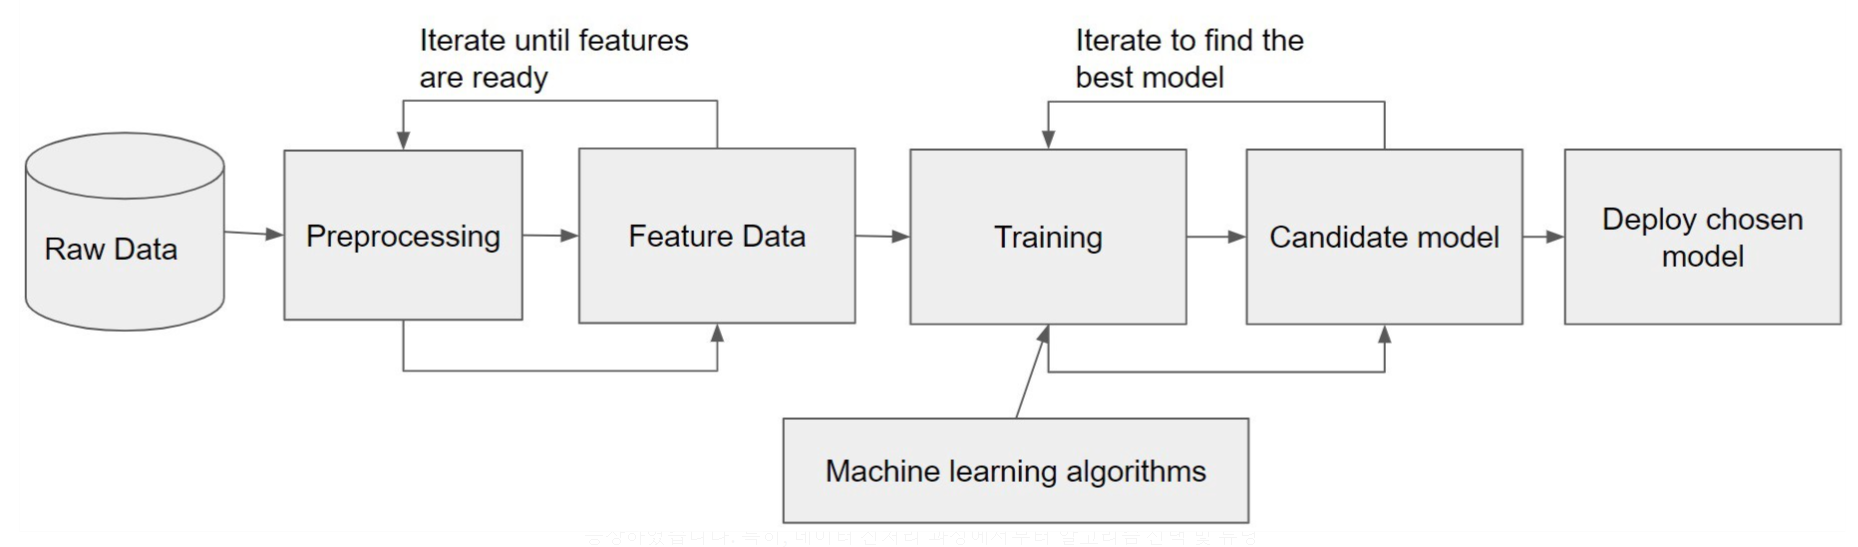

# Feature engineering

자동화 기능 엔지니어링

- import featuretools as ft

**참고링크**

- https://featuretools.alteryx.com/_/downloads/en/latest/pdf/

- https://github.com/alteryx/featuretools

- https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/

# Feature selection

**Automated feature selection with sklearn**

- https://scikit-learn.org/stable/modules/feature_selection.html

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
x=train.drop('target', axis=1)
y=train['target']

In [ ]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x, y)
clf.feature_importances_ 

In [ ]:
feature_list=pd.concat([pd.Series(x.columns), pd.Series(clf.feature_importances_)], axis=1)
feature_list.columns=['features_name','importance']
feature_list.sort_values("importance", ascending =False)[:11]

,features_name,importance
0,id,0.174139
55,date,0.024561
56,hour,0.024528
24,contents_attribute_l,0.024492
57,day,0.023124
30,contents_rn,0.022089
29,person_rn,0.021891
14,person_prefer_e,0.021300
8,person_attribute_a_1,0.020835
27,contents_attribute_e,0.020360


In [ ]:
cb=CatBoostClassifier(random_state=42)

In [ ]:
select=SelectFromModel(estimator=cb, threshold='median')

In [ ]:
x_select=select.fit_transform(x,y)

In [ ]:
print(x_select)

[[     0      1      1 ...     94    422     12]
 [     1      2      2 ...     94    417     17]
 [     2      2      2 ...     48    363     20]
 ...
 [501948      1      1 ...     58    373     17]
 [501949      1      2 ...    250    524      9]
 [501950      1      1 ...    277    548     14]]


**RFE**

 RFE (recursive feature elimination)는 Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식이다.

 - 링크: https://wikidocs.net/16599

In [ ]:
cb=CatBoostClassifier(random_state=42)

In [ ]:
#from sklearn.feature_selection import RFE
#
#rfe = RFE(cb)
#fit = rfe.fit(x, y)
#
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

In [ ]:
#print("Num Features: %d") % fit.n_features_
#print("Selected Features: %s") % fit.support_
#print("Feature Ranking: %s") % fit.ranking_

#Auto ML


AutoML의 경우, AutoSklearn, TPOT(Tree-based Pipeline Optimization Tool), Hyperopt, AutoKeras, MLJAR, AutoGluon, H2O, PyCaret, AutoViML, LightAutoML 등등 뿐 아니라 Google, Microsoft 등등 자체적인 AutoML까지 종류가 매우 많음. 전부 다 써보고 비교해보면 가장 좋겠지만, 간접경험을 통해 이중에서 가장 괜찮은 AutoML을 골라서 집중적으로 파보는게 효율적이라고 판단 됨.

**Compare popular AutoML frameworks on 10 tabular Kaggle competitions**

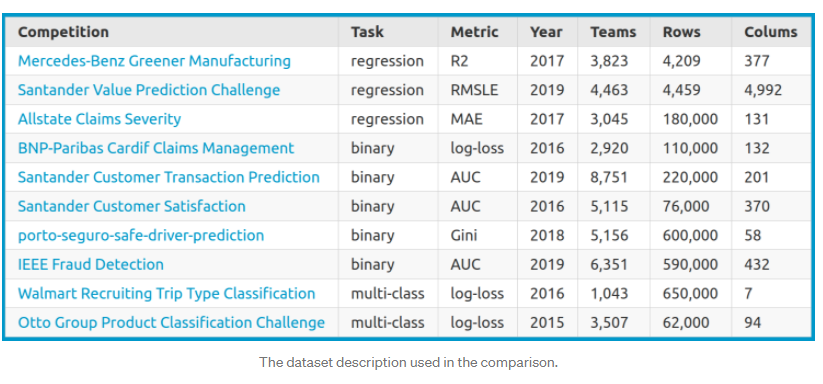



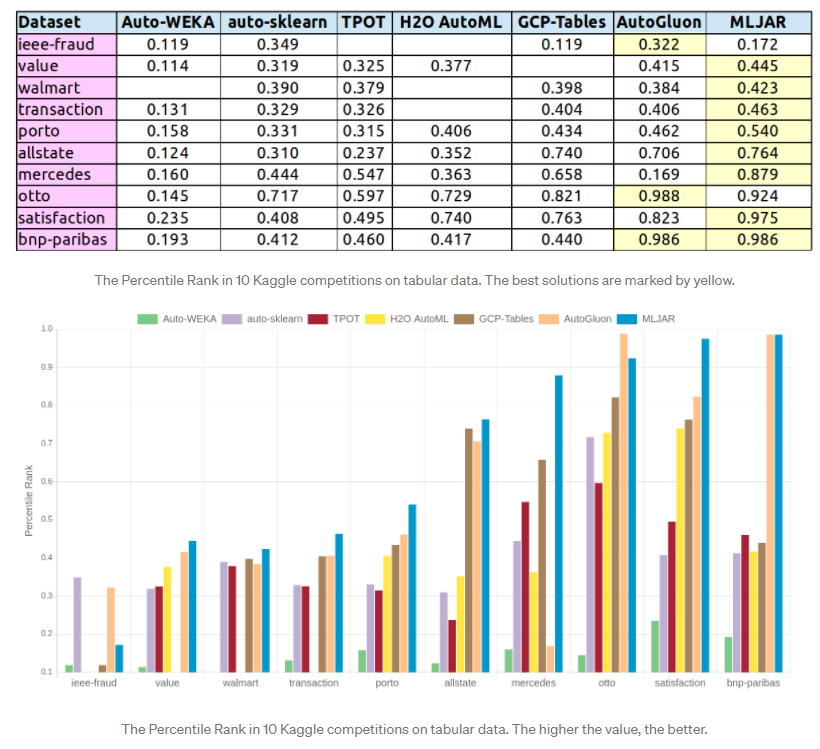

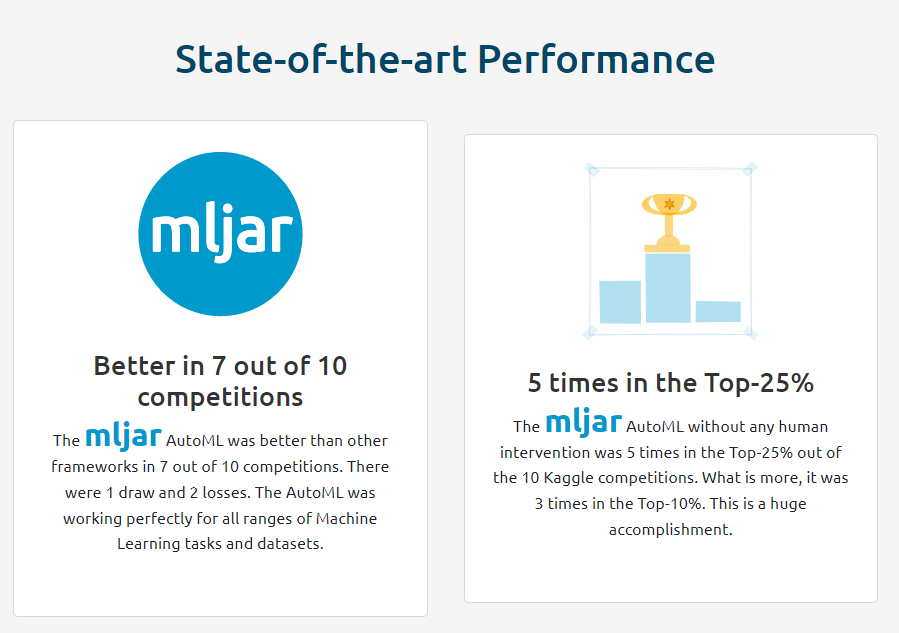

- link: https://towardsdatascience.com/compare-popular-automl-frameworks-on-10-tabular-kaggle-competitions-9b1420e8942d

> **mljar에서도 이를 홍보하고 있음**

- link: https://mljar.com/automl-compare/

이진 분류 대회의 경우, BNP-Paribas Cardif Clalm Management, porto-seguro-safe-driver-prediction. Santander Customer Trensaction Prediction, Santander Customer Satisfaction, IEEE Fraud Detection 5개의 대회가 리스트에 있음.

1. BNP-Paribas Cardif Clalm Management(bnp-paribas)의 경우,  MLJAR, AutoGluton의 성능이 똑같이 가장 높음.

2. Santander Cutomer Trensaction(transaction)의 경우, MLJAR이 성능이 가장 높음

3. Santander Customer Satisfaction(satisfaction)의 경우, MLJAR이 압도적으로 높음

4. IEEE Fraud(ieee-fraud)의 경우, AutoGluon, auto-sklearn이 가장 높고 그 다음에 MLJAR이 높음

5. porto-seguro-safe-driver-prediction(porto)의 경우, MLJAR이 가장 높음

#MLJAR


**MLJAR Automated Machine Learning for Humans**

- https://github.com/mljar/mljar-supervised

**Built-in-modes**

- https://supervised.mljar.com/features/modes/

**AutoML in the Notebook**

- https://mljar.com/blog/automl-notebook/

**AutoML API documentation**

- https://supervised.mljar.com/api/

MLJAR Available Modes
--

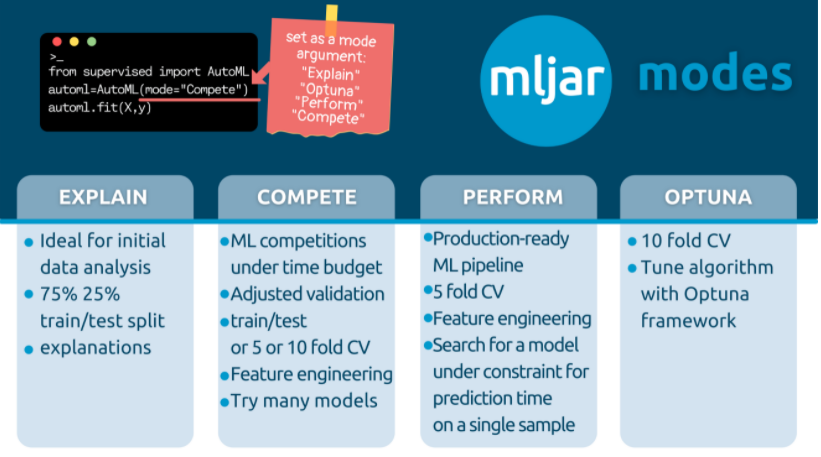

MLJAR의 경우 4가지 모드가 있음. 각각의 모드에 대해 설명하고 코드로 적용해보도록 하자.

**Bulit-in modes의 경우, Explain, Perform, Compete가 있음.**

- https://supervised.mljar.com/features/modes/

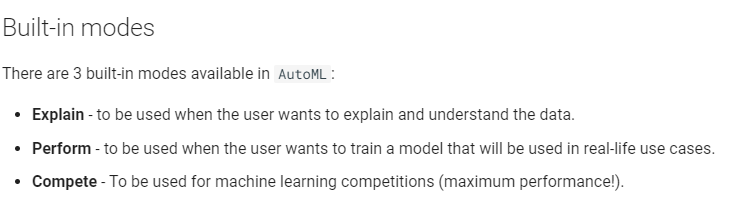

**각 모드에 대한 설명**

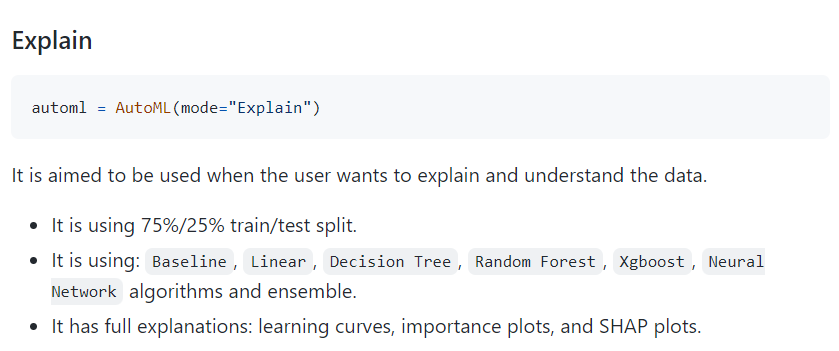

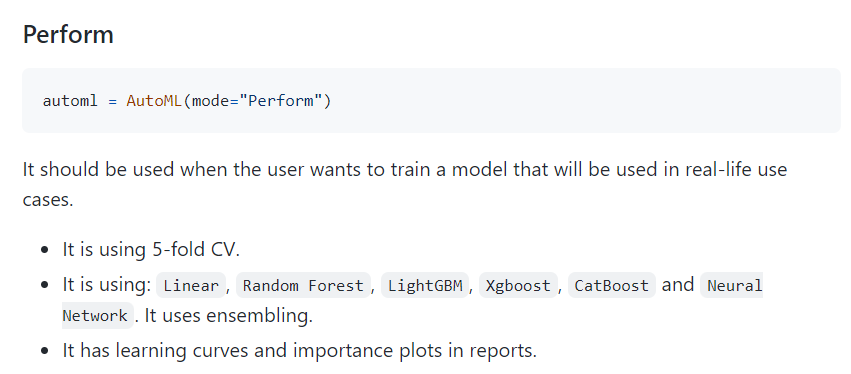

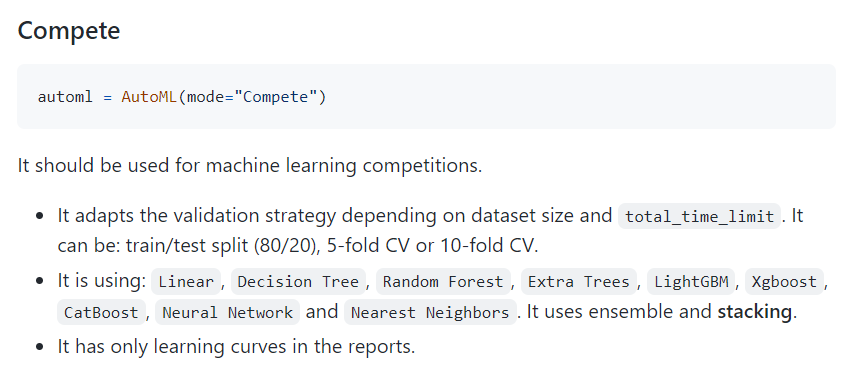

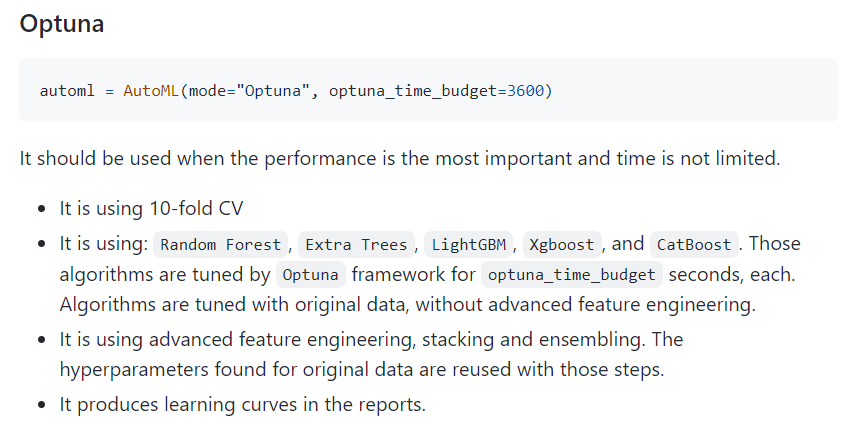

**API documentation**

**AutoML class**

https://supervised.mljar.com/api/

In [ ]:
!pip install mljar-supervised

In [ ]:
from supervised.automl import AutoML

MLJAR Explain
--

MLJAR Explain의 경우, 사용되는 알고리즘

```
Baseline, Linear, Decision Tree, Random Forest, XGBoost, Neural Network, Ensemble 

```

MLJAR Explain의 Steps에 대한 설명
```
simple_algorithms, default_algorithms, ensemble, 
```

MLJAR Explain의 Validation
```
75% / 25% train/test_split
```

Explanations

```
Leaning curves, Importance plots, SHAP plots
```

Tuning(Parameters)
```
start_random_models=1
hill_climbing_stepts=0
top_model_to_imprtoce=1
```


Tuning(Others)

|기준|숫자|
|---|---|
|Models with default hyperparemeters|1|
|Models with not_so_random hyperparameters|0|
|hill_climbing steps|0|
|Top models improved in each hill_climbing step|0|
|Top models improved in each algorithm|1|

- 각각에 대한 자세한 설명: https://supervised.mljar.com/features/automl/

**코드 실습**

In [ ]:
automl=AutoML(mode="Explain", eval_metric="auc")

In [ ]:
automl.fit(x_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_3
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline auc 0.5 trained in 2.56 seconds
2_DecisionTree auc 0.751278 trained in 75.48 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost auc 0.811648 trained in 232.65 seconds
4_Default_NeuralNetwork auc 0.774398 trained in 999.35 seconds
5_Default_RandomForest auc 0.769675 trained in 269.73 seconds
* Step ensemble will try to check up to 1 model
Ensemble auc 0.811648 trained in 16.47 seconds
AutoML fit time: 1653.65 seconds
AutoML best model: 3_Default_Xgboost


AutoML(eval_metric='auc')

In [ ]:
y_pred=automl.predict(x_test)
print("f1_score", f1_score(y_test, y_pred))

f1_score 0.6893155635870793


In [ ]:
confusion_matrix(y_test, y_pred)

array([[42367,  7792],
       [19716, 30516]])

In [ ]:
auc_roc=classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.68      0.84      0.75     50159
           1       0.80      0.61      0.69     50232

    accuracy                           0.73    100391
   macro avg       0.74      0.73      0.72    100391
weighted avg       0.74      0.73      0.72    100391



In [ ]:
automl.report()

Output hidden; open in https://colab.research.google.com to view.

MLJAR Perform
--

MLJAR Perform의 경우, 사용되는 알고리즘

```
Linear, Random Forest, XGBoost, LightGBM, CatBoost, Neural Network, Ensemble 

```

MLJAR Perform의 Steps에 대한 설명
```
simple_algorithms, default_algorithms, not_so_random, golden_features, insert_random_feature, feature_selection, hill_climbing_1, hill_climbing_2, ensemble, 
```

MLJAR Perform의 Validation
```
5-fold CV, Shuffle, Stratify
```

Explanations

```
Leaning curves, Importance plots
```

Tuning(Parameters)
```
start_random_models=5
hill_climbing_stepts=2
top_model_to_imprtoce=2
```

Tuning(Others)

|기준|숫자|
|---|---|
|Models with default hyperparemeters|1|
|Models with not_so_random hyperparameters|4|
|hill_climbing steps|2|
|Top models improved in each hill_climbing step|2|
|Top models improved in each algorithm|abount9^2|



In [ ]:
automl=AutoML(mode="Perform", eval_metric="auc")

In [ ]:
automl.fit(x_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_4
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM auc 0.809848 trained in 1153.82 seconds (1-sample predict time 0.0634 seconds)
* Step not_so_random will try to check up to 20 models
6_LightGBM auc 0.809531 trained in 1936.41 seconds (1-sample predict time 0.0785 seconds)
Skip golden_features because no parameters were generated.
Skip insert_random_feature because no parameters were generated.
Skip features_selection because no parameters were generated.
* St

AutoML(eval_metric='auc', mode='Perform')

In [ ]:
y_pred=automl.predict(x_test)
print("f1_score", f1_score(y_test, y_pred))

f1_score 0.6920781487528855


In [ ]:
confusion_matrix(y_test, y_pred)

array([[42316,  7843],
       [19502, 30730]])

In [ ]:
auc_roc=classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.68      0.84      0.76     50159
           1       0.80      0.61      0.69     50232

    accuracy                           0.73    100391
   macro avg       0.74      0.73      0.72    100391
weighted avg       0.74      0.73      0.72    100391



In [ ]:
automl.report()

MLJAR Compete
--

MLJAR Compete의 경우, 사용되는 알고리즘

```
Decision Tree, Random Forest, Extra Trees,  XGBoost, LightGBM, CatBoost, Neural Network, Nearest Neighbors, Ensemble, Stacking 

```

MLJAR Compete의 Steps에 대한 설명
```
simple_algorithms, default_algorithms, not_so_random, golden_features, insert_random_feature, feature_selection, hill_climbing_1, hill_climbing_2, ensemble, 
stack, ensemble_stacked
```

MLJAR Compete의 Validation
```
10-fold CV, Shuffle, Stratify
```

Explanations

```
Leaning curves
```

Tuning(Parameters)
```
start_random_models=10
hill_climbing_stepts=2
top_model_to_imprtoce=3
```

Tuning(Others)

|기준|숫자|
|---|---|
|Models with default hyperparemeters|1|
|Models with not_so_random hyperparameters|9|
|hill_climbing steps|2|
|Top models improved in each hill_climbing step|3|
|Top models improved in each algorithm|abount16^2|



In [ ]:
automl=AutoML(mode="Compete", eval_metric="auc")

In [ ]:
automl.fit(x_train, y_train)

Linear algorithm was disabled.
AutoML directory: AutoML_5
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree auc 0.748949 trained in 5.26 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 5-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 3 models
1_DecisionTree auc 0.751847 trained in 54.46 seconds
2_DecisionTree auc 0.761491 trained in 59.75 seconds
3_DecisionTree auc 0.761

AutoML(eval_metric='auc', mode='Compete')

In [ ]:
y_pred=automl.predict(x_test)
print("f1_score", f1_score(y_test, y_pred))

f1_score 0.6947041888906247


In [ ]:
confusion_matrix(y_test, y_pred)

array([[41902,  8257],
       [19103, 31129]])

In [ ]:
auc_roc=classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.69      0.84      0.75     50159
           1       0.79      0.62      0.69     50232

    accuracy                           0.73    100391
   macro avg       0.74      0.73      0.72    100391
weighted avg       0.74      0.73      0.72    100391



In [ ]:
automl.report()

Output hidden; open in https://colab.research.google.com to view.

실제로 제출해보기
--

In [ ]:
automl=AutoML(mode="Compete", eval_metric="f1", total_time_limit=7200)

In [ ]:
automl.fit(x, y)

Linear algorithm was disabled.
AutoML directory: AutoML_1
The task is binary_classification with evaluation metric f1
AutoML will use algorithms: ['Decision Tree', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree f1 0.609734 trained in 15.05 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 5-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 3 models
1_DecisionTree f1 0.620989 trained in 119.34 seconds
2_DecisionTree f1 0.620321 trained in 135.41 seconds
3_DecisionTree f1 0.62032

AutoML(eval_metric='f1', mode='Compete', total_time_limit=7200)

- 런타임이 끊어졌으나,  현재까지로 봤을 때, 15_LightGBM_Stacked auc가 0.81458임

In [ ]:
y_pred=automl.predict(x)
print("f1_score", f1_score(y, y_pred))

f1_score 0.6273507347651833


In [ ]:
confusion_matrix(y, y_pred)

array([[234806,  16300],
       [128750, 122095]])

In [ ]:
auc_roc=classification_report(y, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.65      0.94      0.76    251106
           1       0.88      0.49      0.63    250845

    accuracy                           0.71    501951
   macro avg       0.76      0.71      0.70    501951
weighted avg       0.76      0.71      0.70    501951



In [ ]:
pred=automl.predict(test)

In [ ]:
df_pred=pd.DataFrame(pred)

In [ ]:
df_pred=pd.DataFrame(pred, columns=['target'])

In [ ]:
sub_1.drop("target", axis=1, inplace=True)

In [ ]:
sub=pd.concat([sub_1, df_pred], axis=1)

In [ ]:
sub

,id,target
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
46399,46399,0
46400,46400,0
46401,46401,0
46402,46402,0


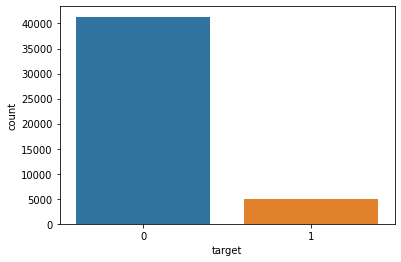

In [ ]:
import seaborn as sns

sns.countplot(sub['target'])

- 실제 스코어가 0.24로 뚝 떨어짐

- 너무 이상하므로, 0이랑 1을 바꿔서 제출해보자

In [ ]:
sub['target']=sub['target'].apply(lambda x:x+10)

In [ ]:
sub['target']=sub['target'].apply(lambda x:0 if x==11 else 1)

In [ ]:
sub.to_csv("sub_mljar_2.csv", index=False)

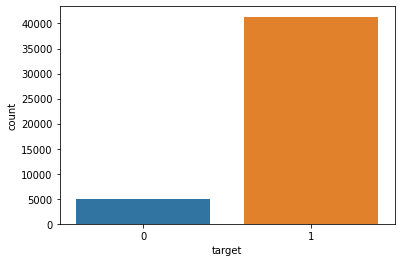

In [ ]:
import seaborn as sns

sns.countplot(sub['target'])

- 0.61로 최고기록

Custom modes
--

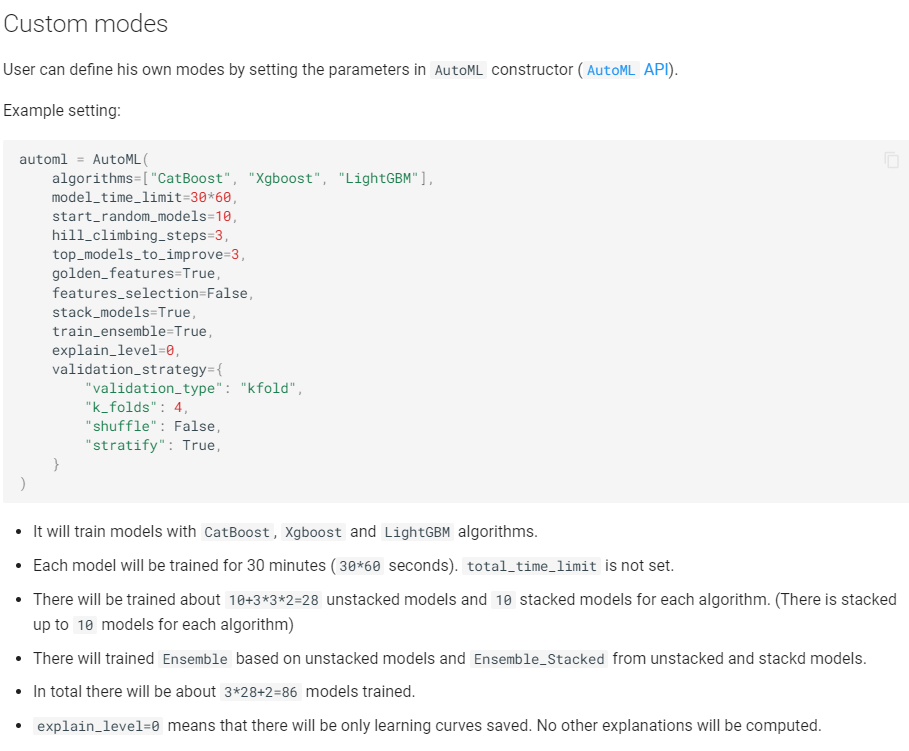

**Parameter 설명**

- https://supervised.mljar.com/api/

|Name|Type|Description|Default|설정할값|
|----|----|---|---|---|
|total_time_limit|int|초단위시간설정|3600|7200|
|mode|str|4가지모드중에설정|'Explain'|'Compete'|
|ml_task|str|target values값에 따라 설정|'auto'|'binary_classification'|
|model_time_limit|int|한 개의 모델의 시간제한 설정|None|None|
|algorithms|list of str|Baseline, Linear, Decision Tree, Random Forest, Extra Trees, LightGBM, Xgboost, CatBoost, Neural Network, Nearest Neighbors|'auto'|'Extra Trees'|
|train_ensemble|boolean|Whether an ensemble gets created at the end of training|True|?|
|stack_models|boolean|Whether a models stack gets created at the end of the training. Stack level is 1.|'auto'|?|
eval_metric|str|binary_classification: logloss, auc, f1, average_precision, accuracy|auto|f1|
|validation_strategy|dict|validation_type을 kfold로 할지, split으로 할지 등등 결정|auto|kfold:10|
explain_level|int|설명요소결정 0은 없음, 1은 importance plot 등등 보여줌, 2는 shap 해석까지|'auto'|2|
golden_features|boolean|변수선택관련, Compete는 들어가있음|'auto'|'auto'|
features_selection|boolean|변수선택관련, Compete는 들어가있음|'auto'|'auto'|
start_random_models|int|모드마다 설정값 정해져있음, 원한다면 1로 바꾸기 가능|'auto'|'auto'|
hill_climbing_steps|int|Number of steps to perform during hill climbing. Compete는 2가 디폴트, 원한다면 0으로 바꿀수 있음|'auto'|'auto'|
top_models_to_improve|int|Number of best models to improve hill_climbing_steps, Compete는 3이 디폴트|'auto'|'auto'|
boost_on_errors|boolean|Whether a model with boost on errors from previous best model should be trained. By default availabel in the Compete mode|'auto'|True|
kmeans_features|boolean|Whether a model with k-means generated features should be trained. By default available in the Compete mode.|'auto'|True|
max_single_prediction_time|int or float|single sample에 대한 예측시간 제한, 빠른 예측을 학 싶다면, REST API를 통해 ML pipelines을 만든다음 사용|None|None|
optuna_time_budget|int|각각 모델에 대한 학습시간 제한 설정, 2개 모델에 1000이면, 각각 1000초씩만 학습|None|None
optuna_init_params|dict|If you have already tuned parameters from Optuna you can reuse them by setting this parameter. This parameter is only used when mode="Optuna".|{}|{}|
optuna_verbose|boolean|If true the Optuna tuning details are displayed. Set to True by default.|True|True|
n_jobs|int|가용할 CPU 개수 default=-1|-1|-1
verbose|int|Controls the verbosity when fitting and predicting. (Note: Still not implemented, pleas left 1|1|1|
random_state|int|Controls the randomness of the AutoML|1234|1234|

In [ ]:
automl=AutoML(total_time_limit=7200, mode="Compete", ml_task="binary_classification", eval_metric='f1',
              algorithms=['Extra Trees']
              validation_strategy={"validation_type":"kfold", "k_folds":10, "shuffle":True,
                                   "stratify":True, "random_seed":1234},
              explain_level=2, boost_on_errors=True, kmeans_features=True)

In [ ]:
automl=AutoML(total_time_limit=7200, mode="Compete", ml_task="binary_classification", eval_metric='f1',
              
              validation_strategy={"validation_type":"kfold", "k_folds":10, "shuffle":True,
                                   "stratify":True, "random_seed":1234},
              explain_level=2, boost_on_errors=True, kmeans_features=True)

MinMax Scaler적용 후 AutoML
--

기존에 했던 Dummy변수 부여 후, MinMax Scaler 적용 후 AutoML
--

Feature Impotance 기준으로 더미변수 부여 후, MinMax Scaler 적용 후 AutoML
--

추가적으로 EDA 후, Feature Engineering & Feature Selection 진행 후, 다시 MLJAR 적용하기

# 기타 AutoML 실습

h20 AutoML 실습
--

링크: https://github.com/keep-steady/automl_h20_practice_python/blob/main/AutoML_practice_2.ipynb

In [ ]:
# 종속 패키지 설차
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
# 기존 h2o 삭제
!pip uninstall h2o
# h2o 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [ ]:
tn, val=train_test_split(train, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
h2o.init()
h2o.no_progress()

In [ ]:
max_runtime_secs = 120

In [ ]:
y='target'
x=list(train.columns)
x.remove(y)

tn, val=train_test_split(train, test_size=0.2, shuffle=True)
h2o_train=h2o.H2OFrame(tn)
h2o_val=h2o.H2OFrame(val)

h2o_train[y]=h2o_train[y].asfactor()
h2o_val[y]=h2o_val[y].asfactor()

aml = H2OAutoML(max_runtime_secs=max_runtime_secs, exclude_algos =['XGBoost', 'StackedEnsemble'])
aml.train(x = x, y = y, training_frame=h2o_train, leaderboard_frame=h2o_val)

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_1_20220110_155248


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 6.7907 ),"nlambda = 30, lambda.max = 17.608, lambda.min = 6.7907, lambda.1se...",58,58,6,AutoML_1_20220110_155248_training_py_1_sid_9dae




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.24636046038004858
RMSE: 0.4963471168245551
LogLoss: 0.6858641651317685
Null degrees of freedom: 401559
Residual degrees of freedom: 401501
Null deviance: 556679.4001985382
Residual deviance: 550831.2283006259
AIC: 550949.2283006259
AUC: 0.6663373784643909
AUCPR: 0.663827799226814
Gini: 0.3326747569287818

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4856703324147113: 


,,0,1,Error,Rate
0,0,44993.0,156098.0,0.7763,(156098.0/201091.0)
1,1,18841.0,181628.0,0.094,(18841.0/200469.0)
2,Total,63834.0,337726.0,0.4356,(174939.0/401560.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.485670,0.674952,301.0
1,max f2,0.463359,0.832905,396.0
2,max f0point5,0.498405,0.621447,206.0
3,max accuracy,0.498683,0.621969,204.0
4,max precision,0.539225,1.000000,0.0
5,max recall,0.458107,1.000000,399.0
6,max specificity,0.539225,1.000000,0.0
7,max absolute_mcc,0.498405,0.244025,206.0
8,max min_per_class_accuracy,0.498819,0.621278,203.0
9,max mean_per_class_accuracy,0.498405,0.621986,206.0



Gains/Lift Table: Avg response rate: 49.92 %, avg score: 49.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.528133,1.828530,1.828530,0.912849,0.530796,0.912849,0.530796,0.018287,0.018287,82.852953,82.852953,0.016547
1,2,0.020002,0.525665,1.720793,1.774661,0.859064,0.526805,0.885956,0.528801,0.017210,0.035497,72.079293,77.466123,0.030942
2,3,0.030000,0.523910,1.634412,1.727919,0.815940,0.524759,0.862621,0.527454,0.016342,0.051838,63.441209,72.791928,0.043608
3,4,0.040001,0.522532,1.566171,1.687480,0.781873,0.523196,0.842433,0.526389,0.015663,0.067502,56.617095,68.747968,0.054915
4,5,0.050000,0.521391,1.503699,1.650729,0.750685,0.521944,0.824086,0.525500,0.015035,0.082536,50.369903,65.072904,0.064972
5,6,0.100000,0.517113,1.450698,1.550714,0.724226,0.519124,0.774156,0.522312,0.072535,0.155071,45.069811,55.071358,0.109972
6,7,0.150000,0.513863,1.320104,1.473844,0.659030,0.515440,0.735780,0.520021,0.066005,0.221077,32.010436,47.384384,0.141933
7,8,0.200000,0.511124,1.269822,1.422838,0.633928,0.512463,0.710317,0.518132,0.063491,0.284568,26.982227,42.283844,0.168874
8,9,0.300000,0.506469,1.197193,1.347623,0.597669,0.508719,0.672768,0.514994,0.119719,0.404287,19.719258,34.762316,0.208251
9,10,0.400000,0.502431,1.129900,1.293192,0.564075,0.504412,0.645595,0.512349,0.112990,0.517277,12.990038,29.319246,0.234191




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.24701329759651858
RMSE: 0.4970043235189394
LogLoss: 0.6871715203386505
Null degrees of freedom: 401559
Residual degrees of freedom: 401502
Null deviance: 556680.0095649848
Residual deviance: 551881.191414377
AIC: 551997.191414377
AUC: 0.6623556253109744
AUCPR: 0.6599731018152465
Gini: 0.3247112506219487

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48799841877326927: 


,,0,1,Error,Rate
0,0,45230.0,155861.0,0.7751,(155861.0/201091.0)
1,1,19422.0,181047.0,0.0969,(19422.0/200469.0)
2,Total,64652.0,336908.0,0.4365,(175283.0/401560.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.487998,0.673817,303.0
1,max f2,0.469153,0.832910,396.0
2,max f0point5,0.498455,0.618260,209.0
3,max accuracy,0.498577,0.618752,208.0
4,max precision,0.532042,1.000000,0.0
5,max recall,0.466090,1.000000,398.0
6,max specificity,0.532042,1.000000,0.0
7,max absolute_mcc,0.498577,0.237564,208.0
8,max min_per_class_accuracy,0.498839,0.618345,205.0
9,max mean_per_class_accuracy,0.498577,0.618765,208.0



Gains/Lift Table: Avg response rate: 49.92 %, avg score: 49.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.523246,1.820549,1.820549,0.908865,0.525430,0.908865,0.525430,0.018207,0.018207,82.054904,82.054904,0.016387
1,2,0.020002,0.521218,1.719297,1.769923,0.858317,0.522150,0.883591,0.523790,0.017195,0.035402,71.929659,76.992281,0.030752
2,3,0.030000,0.519785,1.613458,1.717777,0.805479,0.520466,0.857558,0.522682,0.016132,0.051534,61.345808,71.777656,0.043001
3,4,0.040001,0.518639,1.565672,1.679748,0.781624,0.519191,0.838573,0.521809,0.015658,0.067192,56.567217,67.974810,0.054298
4,5,0.050000,0.517710,1.504198,1.644643,0.750934,0.518157,0.821048,0.521079,0.015040,0.082232,50.419794,64.464331,0.064365
5,6,0.100000,0.514169,1.437529,1.541086,0.717651,0.515828,0.769350,0.518453,0.071876,0.154109,43.752899,54.108615,0.108050
6,7,0.150000,0.511470,1.312223,1.464798,0.655095,0.512781,0.731265,0.516563,0.065611,0.219720,31.222284,46.479838,0.139224
7,8,0.200002,0.509181,1.260182,1.413642,0.629115,0.510302,0.705726,0.514998,0.063012,0.282732,26.018196,41.364237,0.165203
8,9,0.300000,0.505297,1.188094,1.338461,0.593127,0.507177,0.668194,0.512391,0.118806,0.401538,18.809358,33.846131,0.202763
9,10,0.400000,0.501898,1.127805,1.285797,0.563029,0.503568,0.641903,0.510185,0.112781,0.514319,12.780530,28.579731,0.228284




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.567342,0.006579,0.558746,0.568470,0.576340,0.563764,0.569392
1,auc,0.666022,0.004682,0.659934,0.668822,0.672113,0.663682,0.665560
2,err,0.432658,0.006579,0.441254,0.431530,0.423660,0.436236,0.430608
3,err_count,34747.600000,528.370900,35438.000000,34657.000000,34025.000000,35035.000000,34583.000000
4,f0point5,0.587012,0.003207,0.583108,0.587925,0.591448,0.584816,0.587763
5,f1,0.675026,0.000909,0.674636,0.676595,0.675021,0.674405,0.674473
6,f2,0.794142,0.005538,0.800247,0.796762,0.786098,0.796407,0.791194
7,lift_top_group,1.824728,0.019142,1.825812,1.797945,1.851997,1.825031,1.822857
8,logloss,0.685938,0.001680,0.687242,0.684122,0.684077,0.687166,0.687085
9,max_per_class_error,0.764413,0.025691,0.797157,0.766114,0.728227,0.776555,0.754012



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-01-10 15:54:07,0.000 sec,2,.18E2,57,1.380168,1.381332,0.000024,0.0,2.0,0.499999,0.693146,-1.05915e-13,0.5,0.499226,1,0.500774
1,,2022-01-10 15:54:10,2.827 sec,4,.11E2,58,1.376779,1.378544,0.000036,0.0,4.0,0.496347,0.685864,0.0145558,0.666337,0.663828,1.82853,0.435648
2,,2022-01-10 15:54:12,5.698 sec,6,.68E1,59,1.371728,1.374343,0.000052,0.0,NaN,,,,,,,
3,,2022-01-10 15:54:15,8.567 sec,8,.42E1,59,1.364387,0.000000,0.000000,0.0,NaN,,,,,,,



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,id,0.024922,1.000000,0.180638
1,d_l_match_yn,0.009701,0.389240,0.070311
2,d_m_match_yn,0.007918,0.317697,0.057388
3,d_s_match_yn,0.005840,0.234319,0.042327
4,contents_attribute_d_l,0.004150,0.166534,0.030082
5,contents_attribute_d_m,0.004057,0.162793,0.029407
6,contents_attribute_d_s,0.003905,0.156676,0.028302
7,contents_attribute_d_n,0.003896,0.156321,0.028237
8,contents_attribute_d,0.003889,0.156040,0.028187
9,contents_attribute_c,0.003605,0.144637,0.026127



See the whole table with table.as_data_frame()


In [ ]:
leaderboard = aml.leaderboard
performance = aml.leader.model_performance(h2o_val)  # (Optional) Evaluate performance on a test set

model_id   =aml.leader.model_id  # 최고 모델 명
accuracy   =performance.accuracy()  # 정확도
precision  =performance.precision()  # precision
recall     =performance.recall()  # recall
F1         =performance.F1()  # f1
auc        =performance.auc()  # auc
variable_importance=aml.leader.varimp()  # 중요한 입력 변수

print("model_id", model_id)
print("accuracy", accuracy)
print("precision", precision)
print("recall", recall)
print("F1", F1)
print("auc", auc)
print("variable_importance", variable_importance)

model_id GLM_1_AutoML_1_20220110_155248
accuracy [[0.49865147595766124, 0.6218386110308693]]
precision [[0.5392980157360486, 1.0]]
recall [[0.4605769710024039, 1.0]]
F1 [[0.48548892272701055, 0.6775804292023287]]
auc 0.6664786839158671
variable_importance [('id', 0.02492193877696991, 1.0, 0.18063790065680113), ('d_l_match_yn', 0.009700613096356392, 0.3892399055775156, 0.07031147939537391), ('d_m_match_yn', 0.0079176165163517, 0.3176966522230719, 0.05738805630326956), ('d_s_match_yn', 0.005839685909450054, 0.23431908575453383, 0.04232690773451994), ('contents_attribute_d_l', 0.004150343593209982, 0.1665337368152621, 0.03008230460684118), ('contents_attribute_d_m', 0.004057110752910376, 0.1627927421384851, 0.029406539182059915), ('contents_attribute_d_s', 0.0039046593010425568, 0.15667558354853234, 0.02830154849638613), ('contents_attribute_d_n', 0.003895810339599848, 0.156320516411826, 0.028237409914219275), ('contents_attribute_d', 0.003888825187459588, 0.1560402351623305, 0.0281867804

In [ ]:
print(performance)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.2463543888248157
RMSE: 0.49634100054782465
LogLoss: 0.6858519919145227
Null degrees of freedom: 100390
Residual degrees of freedom: 100332
Null deviance: 139172.83642237814
Residual deviance: 137706.7346405817
AIC: 137824.7346405817
AUC: 0.6664786839158671
AUCPR: 0.6658619675052238
Gini: 0.33295736783173413

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48548892272701055: 


,,0,1,Error,Rate
0,0,11008.0,39007.0,0.7799,(39007.0/50015.0)
1,1,4578.0,45798.0,0.0909,(4578.0/50376.0)
2,Total,15586.0,84805.0,0.4342,(43585.0/100391.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.485489,0.677580,305.0
1,max f2,0.461989,0.834333,397.0
2,max f0point5,0.498651,0.623199,203.0
3,max accuracy,0.498651,0.621839,203.0
4,max precision,0.539298,1.000000,0.0
5,max recall,0.460577,1.000000,398.0
6,max specificity,0.539298,1.000000,0.0
7,max absolute_mcc,0.498651,0.243659,203.0
8,max min_per_class_accuracy,0.498755,0.620375,202.0
9,max mean_per_class_accuracy,0.498651,0.621827,203.0



Gains/Lift Table: Avg response rate: 50.18 %, avg score: 49.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,0.528149,1.818163,1.818163,0.912351,0.530736,0.912351,0.530736,0.018183,0.018183,81.816319,81.816319,0.016424
1,2,0.020002,0.525684,1.667311,1.742737,0.836653,0.526829,0.874502,0.528782,0.016675,0.034858,66.731122,74.273721,0.029819
2,3,0.030003,0.523984,1.645477,1.710317,0.825697,0.524778,0.858234,0.527448,0.016456,0.051314,64.547738,71.031727,0.042777
3,4,0.040004,0.522595,1.587915,1.679717,0.796813,0.523267,0.842878,0.526402,0.015881,0.067195,58.791545,67.971681,0.054578
4,5,0.050004,0.521378,1.524399,1.648653,0.764940,0.521958,0.827291,0.525514,0.015245,0.082440,52.439883,64.865322,0.065105
5,6,0.100009,0.517147,1.447782,1.548218,0.726494,0.519142,0.776892,0.522328,0.072396,0.154836,44.778191,54.821756,0.110049
6,7,0.150003,0.513958,1.316247,1.470904,0.660490,0.515491,0.738097,0.520049,0.065805,0.220641,31.624713,47.090435,0.141784
7,8,0.200008,0.511113,1.258820,1.417881,0.631673,0.512502,0.711490,0.518162,0.062947,0.283587,25.881997,41.788062,0.167762
8,9,0.300007,0.506461,1.211899,1.349222,0.608128,0.508710,0.677037,0.515012,0.121189,0.404776,21.189868,34.922225,0.210294
9,10,0.400006,0.502402,1.116614,1.291072,0.560315,0.504416,0.647857,0.512363,0.111660,0.516436,11.661427,29.107171,0.233701


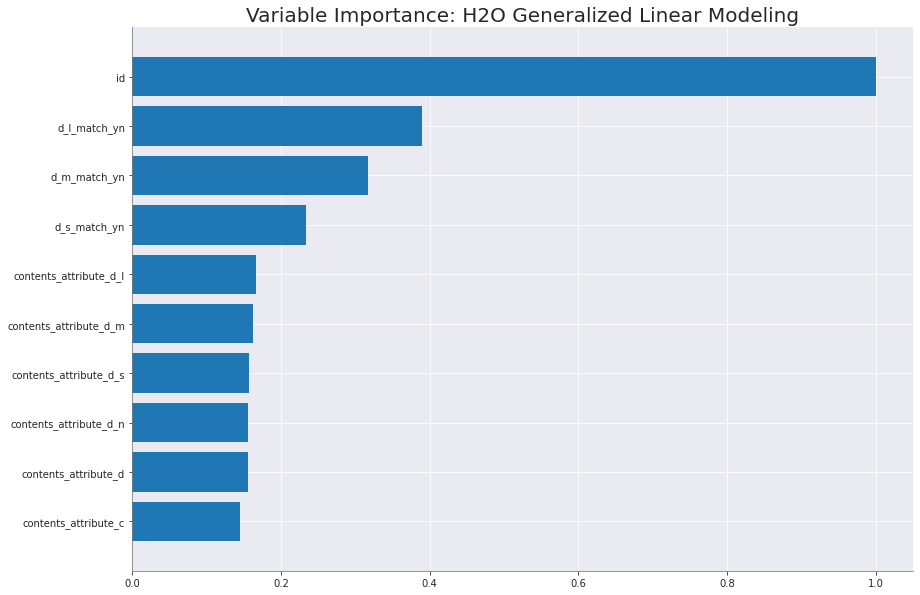

predict
1
1
1
1
1
0
1
1
1
1


target
1
1
0
1
0
0
0
1
1
1


<Figure size 432x288 with 0 Axes>

In [ ]:
## 중요 변수 시각화
aml.leader.varimp_plot()

## automl 결과 확인
# Get AutoML object by `project_name`
get_aml = h2o.automl.get_automl(aml.project_name)
# Predict with top model from AutoML Leaderboard on a H2OFrame called 'test'
label_predicted = get_aml.predict(h2o_val)
print(label_predicted['predict'])
print(h2o_val['target'])

AutoSklearn 실습
--

 - 참고링크: https://ichi.pro/ko/meosin-leoning-silmujaleul-wihan-auto-sklearn-automl-e-daehan-ppaleun-sijag-gaideu-204041439722513

In [ ]:
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import f1_score

In [ ]:
import autosklearn

In [ ]:
x=train.drop("target", axis=1)
y=train["target"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=1200,  metric=autosklearn.metrics.roc_auc)

In [ ]:
automl.fit(x_train, y_train)

AutoSklearnClassifier(metric=roc_auc, per_run_time_limit=120,
                      time_left_for_this_task=1200)

In [ ]:
!pip install PipelineProfiler

In [ ]:
import PipelineProfiler
# automl is an object Which has already been created.
profiler_data= PipelineProfiler.import_autosklearn(automl)
PipelineProfiler.plot_pipeline_matrix(profiler_data)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
y_pred=automl.predict(x_test)

In [ ]:
print(automl.show_models())

[(1.000000, MyDummyClassifier(config=1,
                  init_params={'data_preprocessor:feat_type': {'contents_attribute_a': 'numerical',
                                                               'contents_attribute_c': 'numerical',
                                                               'contents_attribute_d': 'numerical',
                                                               'contents_attribute_d_l': 'numerical',
                                                               'contents_attribute_d_m': 'numerical',
                                                               'contents_attribute_d_n': 'numerical',
                                                               'contents_attribute_d_s': 'numerical',
                                                               'contents_attribute_e': 'nu...
                                                               'contents_rn': 'numerical',
                                                               'd_l

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 49c0dcca-72e2-11ec-8b67-0242ac1c0002
  Metric: roc_auc
  Number of target algorithm runs: 172
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 172



Pycaret
--

- 참고링크: https://dacon.io/codeshare/1701?fbclid=IwAR2tuuAM4EcdPe2BWMqbklG75zEKMe5mV_HKu3pS-qVjEKGXZBEgNgd5Ie4

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
clf=setup(data=train, target='target', train_size=0.8, silent=True, pca=True, use_gpu=True, log_data=True)
# setup은 자동으로 전처리 해주는 코드

,Description,Value
0,session_id,6304
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(501951, 59)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,28
8,Ordinal Features,False
9,High Cardinality Features,False


- 공식문서: https://pycaret.readthedocs.io/en/latest/api/classification.html

- 참고링크: https://dacon.io/codeshare/2428

In [ ]:
best_5 = compare_models(sort = 'F1', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5002,0.5000,1.0000,0.5002,0.6668,0.0000,0.0000,0.166
ridge,Ridge Classifier,0.5117,0.0000,0.5565,0.5109,0.5327,0.0233,0.0234,0.274
lda,Linear Discriminant Analysis,0.5117,0.5217,0.5565,0.5109,0.5327,0.0233,0.0234,0.403
lr,Logistic Regression,0.5116,0.5217,0.5537,0.5109,0.5314,0.0231,0.0232,0.599
knn,K Neighbors Classifier,0.5207,0.5272,0.5240,0.5207,0.5224,0.0414,0.0414,2.913
et,Extra Trees Classifier,0.5200,0.5282,0.5143,0.5205,0.5174,0.0401,0.0401,65.493
rf,Random Forest Classifier,0.5195,0.5282,0.5125,0.5200,0.5162,0.0390,0.0390,116.700
svm,SVM - Linear Kernel,0.5047,0.0000,0.5231,0.5043,0.5130,0.0094,0.0095,29.957
dt,Decision Tree Classifier,0.5117,0.5117,0.5125,0.5119,0.5122,0.0234,0.0234,3.442
qda,Quadratic Discriminant Analysis,0.5088,0.5219,0.5090,0.5090,0.5090,0.0175,0.0175,0.274


- 자세한 설명: https://dacon.io/codeshare/2428


In [ ]:
best_5

[DummyClassifier(constant=None, random_state=6304, strategy='prior'),
 RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                 max_iter=None, normalize=False, random_state=6304,
                 solver='auto', tol=0.001),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=6304, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform')]

In [ ]:
# 모델앙상블
#blended = blend_models(estimator_list = best_5, fold = 5, method = 'soft')
#pred_holdout = predict_model(blended)
#final_model = finalize_model(blended)
#predictions = predict_model(final_model, data = test)
#predictions
#predictions.rename(columns={'Score':'target'}, inplace=True)
#predictions["target"]=predictions["target"].apply(lambda x:1 if x>=0.5 else 0)
#sub_1['target']=predictions['target']
#sub_1.to_csv('sub.csv', index=False)

In [ ]:
df_pred=predict_model(model_dummy)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.4979,0.5,1.0,0.4979,0.6648,0.0,0.0


**create model**

- https://pycaret.org/create-model/

- 모델을 각각 보는 방법 하단 참고

**dummy classifier**

In [ ]:
model_dummy = create_model('dummy', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5002,0.5,1.0,0.5002,0.6668,0.0,0.0
1,0.5002,0.5,1.0,0.5002,0.6668,0.0,0.0
2,0.5002,0.5,1.0,0.5002,0.6668,0.0,0.0
3,0.5002,0.5,1.0,0.5002,0.6668,0.0,0.0
4,0.5002,0.5,1.0,0.5002,0.6668,0.0,0.0
Mean,0.5002,0.5,1.0,0.5002,0.6668,0.0,0.0
SD,0.0000,0.0,0.0,0.0000,0.0000,0.0,0.0


**Gradient Boosting Classifier**

In [ ]:
model_gbc = create_model('gbc', fold = 5)
model_list.append(model_gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5312,0.5420,0.4084,0.5406,0.4653,0.0622,0.0641
1,0.5301,0.5407,0.4487,0.5353,0.4882,0.0601,0.0609
2,0.5290,0.5398,0.4284,0.5355,0.4760,0.0577,0.0589
3,0.5290,0.5396,0.4406,0.5346,0.4831,0.0579,0.0588
4,0.5286,0.5402,0.4175,0.5360,0.4694,0.0570,0.0584
Mean,0.5296,0.5405,0.4287,0.5364,0.4764,0.0590,0.0602
SD,0.0010,0.0009,0.0147,0.0021,0.0084,0.0019,0.0021


**lightgbm**

In [ ]:
model_lgbm = create_model('lightgbm', fold = 5)
model_list.append(model_lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5339,0.5486,0.4793,0.5373,0.5066,0.0676,0.0680
1,0.5343,0.5479,0.4710,0.5385,0.5025,0.0684,0.0689
2,0.5325,0.5445,0.4594,0.5374,0.4953,0.0649,0.0656
3,0.5325,0.5466,0.4790,0.5357,0.5058,0.0649,0.0652
4,0.5336,0.5477,0.4772,0.5372,0.5054,0.0671,0.0675
Mean,0.5334,0.5471,0.4732,0.5372,0.5031,0.0666,0.0671
SD,0.0007,0.0014,0.0075,0.0009,0.0041,0.0014,0.0014


**catboost**

In [ ]:
model_cb = create_model('catboost', fold = 5)
model_list.append(model_cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5300,0.5447,0.4537,0.5347,0.4909,0.0599,0.0606
1,0.5311,0.5451,0.4553,0.5360,0.4923,0.0621,0.0628
2,0.5289,0.5424,0.4448,0.5341,0.4853,0.0577,0.0585
3,0.5290,0.5428,0.4626,0.5328,0.4952,0.0579,0.0584
4,0.5308,0.5430,0.4590,0.5353,0.4942,0.0615,0.0622
Mean,0.5300,0.5436,0.4551,0.5346,0.4916,0.0598,0.0605
SD,0.0009,0.0011,0.0060,0.0011,0.0035,0.0018,0.0018


TPOT
--

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier

In [ ]:
x=train.drop("target", axis=1)
y=train["target"]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, max_time_mins=60)
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


64.87 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=8, min_samples_leaf=15, min_samples_split=2)


TPOTClassifier(generations=5, max_time_mins=60, population_size=50, verbosity=2)

TPOT: Tree-Based Pipeline Optimization Tool

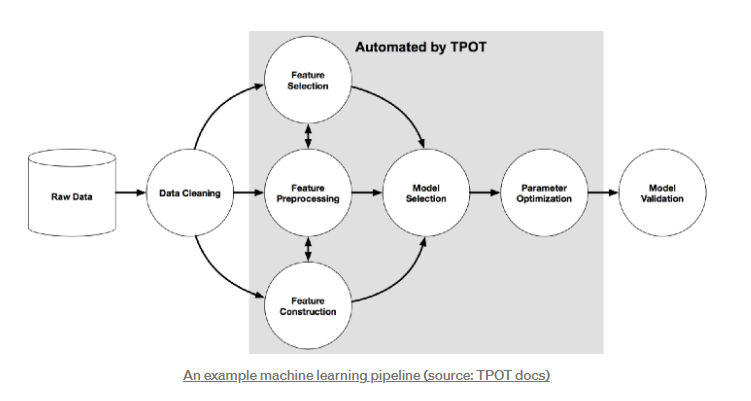

In [ ]:
from sklearn.metrics import f1_score

y_pred=tpot.predict(x_test)

print("f1_score", f1_score(y_test, y_pred))
print("train_score", tpot.score(x_train, y_train))
print("test_score", tpot.score(x_test, y_test))

f1_score 0.6401923619545349
train_score 0.7101130590696284
test_score 0.7078522975167096


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[44970,  5189],
       [24140, 26092]])

In [ ]:
from sklearn.metrics import classification_report
auc_roc=classification_report(y_test, y_pred)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.65      0.90      0.75     50159
           1       0.83      0.52      0.64     50232

    accuracy                           0.71    100391
   macro avg       0.74      0.71      0.70    100391
weighted avg       0.74      0.71      0.70    100391



In [ ]:
#sub.to_csv("sub_tpot.csv", index=False)

#And so on

AutoVIML

- https://towardsdatascience.com/autoviml-automating-machine-learning-4792fee6ae1e

Hyperopt-Sklearn

- https://machinelearningmastery.com/automl-libraries-for-python/?fbclid=IwAR2s53oKt3m69UInFwWiKA7cPM1Dv4RudPMWH7Szcim8tMZyEx3hDNYKeZI

autokeras, MLJAR, AutoGluon 등등

- https://www.analyticsvidhya.com/blog/2021/09/10-automated-machine-learning-for-supervised-learning-part-2/?fbclid=IwAR2-0OJUFd68VCybpyhCE0t4j7m_fwZxozxs2zEwELys7scmVrQB_64Y7C4





AutoML 관련 글

- https://doooob.tistory.com/110

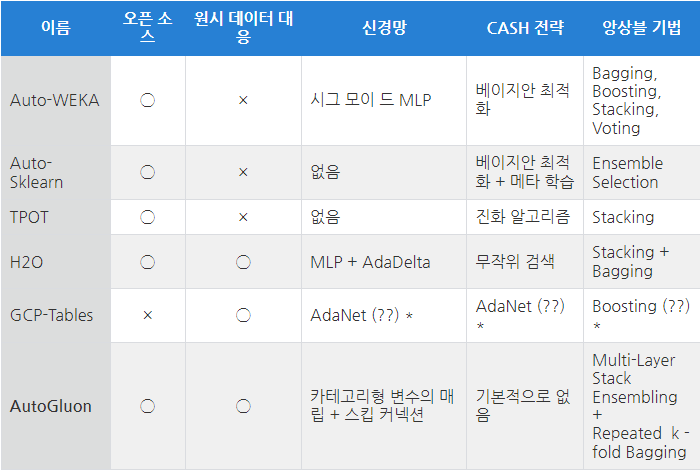

Auto-Sklearn, TPOT, H2O, Pycaret, AutoGluon 다섯 가지를 추가적으로 더 집중해서 파보자.